In [1]:
import requests
import os
import pystac_client

In [4]:



planetary_endpoint = "https://planetarycomputer.microsoft.com/api/stac/v1/"

catalog = pystac_client.Client.open(planetary_endpoint)

item_collection = catalog.search(
    collections=['modis-11A2-061'],
    bbox=[38.837314, 21.092348, 39.592624, 22.136691],
    datetime='1982-08-22/2025-12-31',
    #max_items=1000
).item_collection()


print(f"found {len(item_collection)} scenes.")



found 0 scenes.


In [6]:
item = item_collection[1]
print("Available assets :", item.assets.keys()) 
'''
datetimes = [item.properties['datetime'] for item in item_collection]
earliest = min(datetimes)
latest = max(datetimes)

print(f"Earliest scene: {earliest}")
print(f"Latest scene: {latest}")
'''

Available assets : dict_keys(['hdf', 'QC_Day', 'Emis_31', 'Emis_32', 'QC_Night', 'metadata', 'LST_Day_1km', 'Day_view_angl', 'Day_view_time', 'LST_Night_1km', 'Clear_sky_days', 'Night_view_angl', 'Night_view_time', 'Clear_sky_nights', 'tilejson', 'rendered_preview'])


'\ndatetimes = [item.properties[\'datetime\'] for item in item_collection]\nearliest = min(datetimes)\nlatest = max(datetimes)\n\nprint(f"Earliest scene: {earliest}")\nprint(f"Latest scene: {latest}")\n'

In [7]:
item_collection[1]

<Item id=MOD11A2.A2025161.h21v06.061.2025171214742>

In [3]:
for item in item_collection[:5]:
    print("ID:", item.id)
    print("datetime:", item.datetime)
    print("start:", item.properties.get("start_datetime"))
    print("end:", item.properties.get("end_datetime"))

ID: MYD11A2.A2025161.h21v06.061.2025171215346
datetime: None
start: 2025-06-10T00:00:00Z
end: 2025-06-17T23:59:59Z
ID: MOD11A2.A2025161.h21v06.061.2025171214742
datetime: None
start: 2025-06-10T00:00:00Z
end: 2025-06-17T23:59:59Z
ID: MYD11A2.A2025153.h21v06.061.2025163061735
datetime: None
start: 2025-06-02T00:00:00Z
end: 2025-06-09T23:59:59Z
ID: MOD11A2.A2025153.h21v06.061.2025163053755
datetime: None
start: 2025-06-02T00:00:00Z
end: 2025-06-09T23:59:59Z
ID: MYD11A2.A2025145.h21v06.061.2025154060240
datetime: None
start: 2025-05-25T00:00:00Z
end: 2025-06-01T23:59:59Z


In [16]:


output_folder = "/mnt/datawaha/hyex/gahwagrw/SaudiUHI/sat_data/raw/Jeddah/landsat"


In [15]:
band = 'lwir11'

for item in item_collection:
    item = planetary_computer.sign(item)
    scene_id = item.id
    scene_date = item.datetime.date()

    for band in bands_to_download:
        if band not in item.assets:
            print(f"[{scene_id}] Band {band} not found, skipping.")
            continue

        asset = item.assets[band]
        url = asset.href
        filename = f"{scene_id}_{band}.tif"
        filepath = os.path.join(output_folder, filename)

        if os.path.exists(filepath):
            print(f"[{scene_id}] {band} already downloaded.")
            continue

        print(f"Downloading {filename} from {scene_date}...")
        try:
            with requests.get(url, stream=True) as r:
                r.raise_for_status()
                with open(filepath, 'wb') as f:
                    for chunk in r.iter_content(chunk_size=8192):
                        f.write(chunk)
        except Exception as e:
            print(f"Failed to download {filename}: {e}")

[LE07_L2SP_170045_20231221_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_170045_20231216_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169046_20231206_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169045_20231206_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_170045_20231119_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_170046_20231114_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_170045_20231114_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169046_20231109_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169045_20231109_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_171045_20231023_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_170045_20231018_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169046_20231013_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_171045_20230926_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169046_20230916_02_T1] Band lwir11 not found, skipping.
[LE07_L2SP_169045_20230916_02_T1] Band lwir11 not found, skipp

KeyboardInterrupt: 

In [ ]:
## inspect the data 

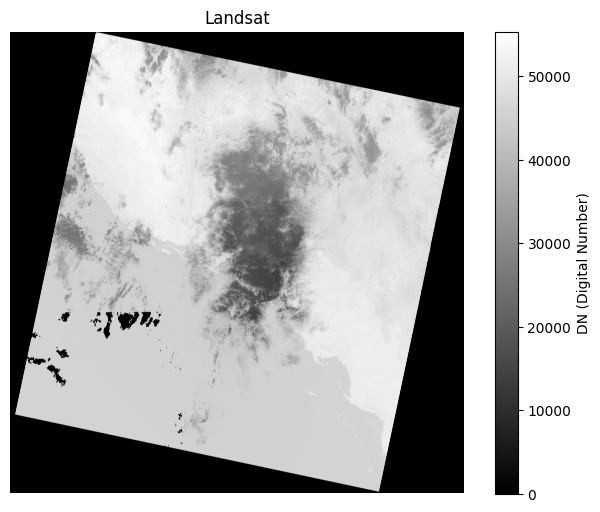

In [3]:
import rasterio
import matplotlib.pyplot as plt

# Path to a downloaded band (change this to match your file)
band_path = "/mnt/datawaha/hyex/gahwagrw/SaudiUHI/sat_data/raw/Jeddah/landsat/LC09_L2SP_169046_20240909_02_T1_lwir11.tif"

# Open the raster file
with rasterio.open(band_path) as src:
    band = src.read(1)  # Read the first band
    profile = src.profile

# Display
plt.figure(figsize=(8, 6))
plt.imshow(band, cmap='gray')
plt.title("Landsat")
plt.colorbar(label='DN (Digital Number)')
plt.axis('off')
plt.show()
